##Linear Regression with one variable FuncAnimation

In [ ]:
# import necessary packages needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [101]:
# Generate dummy dataset
initial=1
last=7
tot=10
X=np.linspace(initial,last,tot)
Y=4*X

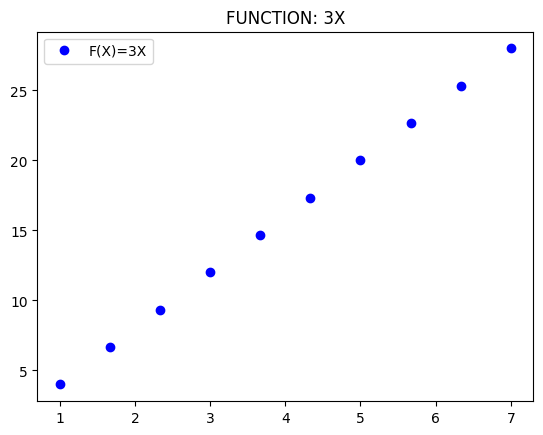

In [102]:
# Basic visualization of the above data
plt.plot(X,Y, "bo",label="F(X)=3X")
plt.legend()
plt.title("FUNCTION: 3X")
plt.show()

In [103]:
# 3X is very simple to learn. Let's make it a little bit hard to learn by adding some noise
mean=0
std=1 #standard deviation
pop=100 #Population
noise=np.random.normal(mean, std, pop)
X=np.linspace(initial,last,pop)
y=4*X + noise
X.shape,y.shape

((100,), (100,))

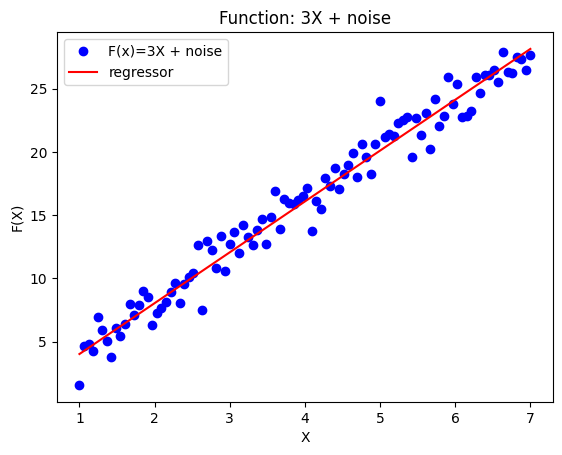

In [116]:
# Let's visualize the new function
plt.plot(X,y,"bo", label="F(x)=3X + noise")
plt.plot(X,4.02*X,c='r', label="regressor")
plt.legend()
plt.title("Function: 3X + noise")
plt.xlabel("X")
plt.ylabel("F(X)")
plt.show()

HUH! Our data is ready. So let's build a model now

##Model Development

In [105]:
# Initialze the weight, w
w=0

In [106]:
# initialize the model, y_hat
y_hat=w*X
y_hat;

In [107]:
# Computation of the loss/cost Function
def loss_func(y,y_hat):
   return (y-y_hat)**2

# testing the code
l= loss_func(y,y_hat)
np.mean(l)

310.67216762450784

In [108]:
# Computation of the derivative of the Loss/cost Function wrt w
def grad_w(x,y,y_hat):
   return np.mean(-x*(y-y_hat))

# testing the code
grad= grad_w(X,y,y_hat)
grad

-76.76511871959386

In [109]:
# Update w
def update_w(W, gradient,alpha):
   return w-(alpha*gradient)

# testing code
update_w(w,grad_w(X,y,y_hat),0.01)

0.7676511871959386

In [112]:
# Let's rap the pieces of codes in a function
def fit_reg(x,y,epochs=50,w=0,alpha=0.01,t=5):
   history={"Cost":[], "weight":[]}
   for i in range(epochs):
      y_hat=w*x
      loss= ((y-y_hat)**2)
      cost=np.mean(loss)
      grad=-2*x*(y-y_hat)
      grad_cost=np.mean(grad)
      w=w-(alpha*grad_cost)
      if i%t==0:
         history ["Cost"].append(round(cost,2))
         history ["weight"].append(round(w,2))
         print (f"Training epoch {i}: cost = {round(cost,2)} @ w = {round(w,2)}")
   return history

# testing code
history=fit_reg(X,y,epochs=14,alpha=0.01,t=1)

Training epoch 0: cost = 310.67 @ w = 1.54
Training epoch 1: cost = 119.89 @ w = 2.49
Training epoch 2: cost = 46.83 @ w = 3.07
Training epoch 3: cost = 18.86 @ w = 3.44
Training epoch 4: cost = 8.15 @ w = 3.66
Training epoch 5: cost = 4.05 @ w = 3.8
Training epoch 6: cost = 2.48 @ w = 3.89
Training epoch 7: cost = 1.88 @ w = 3.94
Training epoch 8: cost = 1.65 @ w = 3.97
Training epoch 9: cost = 1.56 @ w = 3.99
Training epoch 10: cost = 1.53 @ w = 4.01
Training epoch 11: cost = 1.51 @ w = 4.01
Training epoch 12: cost = 1.51 @ w = 4.02
Training epoch 13: cost = 1.51 @ w = 4.02


In [ ]:
wrange=np.linspace(-7,11)

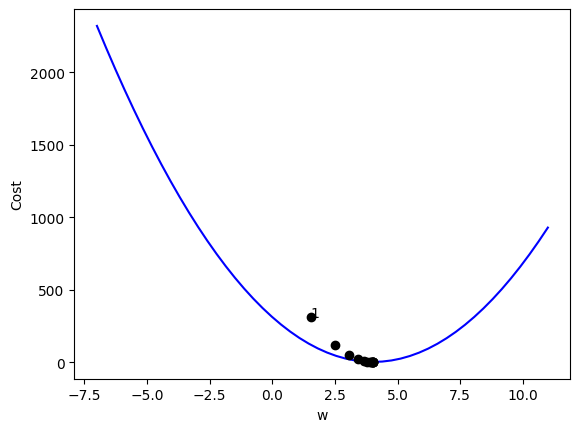

{'Cost': [310.67,
  119.89,
  46.83,
  18.86,
  8.15,
  4.05,
  2.48,
  1.88,
  1.65,
  1.56,
  1.53,
  1.51,
  1.51,
  1.51],
 'weight': [1.54,
  2.49,
  3.07,
  3.44,
  3.66,
  3.8,
  3.89,
  3.94,
  3.97,
  3.99,
  4.01,
  4.01,
  4.02,
  4.02]}

In [113]:

cost = [np.mean((y-(X*w))**2) for w in wrange]
plt.plot(wrange, cost, 'b')
plt.plot(history['weight'], history['Cost'], 'ko')
plt.annotate('1', xy=(history['weight'][0],  history['Cost'][0]), xytext=(history['weight'][0],  history['Cost'][0]))
plt.xlabel('w')
plt.ylabel('Cost')
plt.show()
history

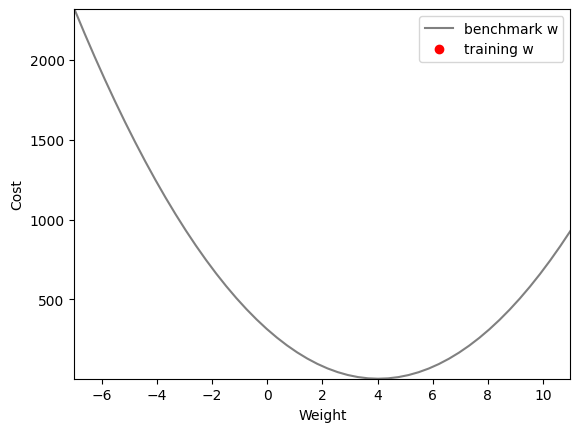

In [115]:
# Animation
x1=history ["weight"]
y1=history["Cost"]
fig, ax=plt.subplots()
ax.set_xlim(np.min(wrange),np.max(wrange))
ax.set_ylim(np.min(y1),np.max(cost))
plt.xlabel("Weight")
plt.ylabel("Cost")


# I plot
plt.plot(wrange,cost,c="grey", label="benchmark w")
Line2=ax.plot(x1[0], y1[0],"ro", label="training w")[0]
ax.legend()

def update (frames):
   Line2.set_xdata(x1[: frames])
   Line2.set_ydata(y1[: frames])
   return Line2,#Line2)

animate= FuncAnimation (fig=fig, func=update, frames=len(x1), interval=500)
from IPython.display import HTML
HTML(animate.to_html5_video())

In [ ]:
np.min(cost),y1

(1.2712523107280744,
 [171.43, 2.58, 1.19, 1.18, 1.18, 1.18, 1.18, 1.18, 1.18, 1.18])